<a href="https://colab.research.google.com/github/CarolyneS14/Hipoteses/blob/main/Hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HIPÓTESES** 🎵🎼🎶
<br>
O objetivo desse estudo é permitir que o nosso cliente, Gravadora e novos artistas tomem decisões informadas para aumentar suas chances de alcançar o sucesso no cenário musical global.
</br>
<br>
Equipe de analista:
<br>
Carolyne Santos de Oliveira
</br>

##**<font color = red>Importando as bibliotecas :**

*   Bibliotecas utilizadas.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from scipy.stats import shapiro
from tabulate import tabulate
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from scipy.stats import pearsonr, linregress
import plotly.graph_objects as go
import seaborn as sns
import math

##**<font color = red>Importando o banco de dados :**

* Chamei o banco de dados de gravadora (padrao: df).
* Importei meu arquivo csv n_musicas para cálculo da hipótese 5.

In [2]:
url_Gravadora = 'https://raw.githubusercontent.com/CarolyneS14/Hipoteses/main/Tab_Gravadora_Final.csv'

# Ler o arquivo CSV diretamente do GitHub
gravadora = pd.read_csv(url_Gravadora)

# Exibir o DataFrame
print(gravadora.head())

   artist_count  released_year  released_month  released_day  \
0             2           2021              11            19   
1             1           1998               3            31   
2             1           2019              10            18   
3             1           2015               5            10   
4             1           2003               9            23   

   in_spotify_playlists  in_spotify_charts  bpm  danceability__  valence__  \
0                  3541                  2  172              31          4   
1                 13101                  9  156              32         49   
2                   794                 10  150              34         24   
3                  3006                  3  180              35         41   
4                 51979                 15  148              35         24   

   energy__  ...  quartil_speechiness  segmentacao_streams  segmentacao_bpm  \
0        86  ...                    4                Baixo         

In [3]:
url_N_Musicas = 'https://raw.githubusercontent.com/CarolyneS14/Hipoteses/main/Tab_Gravadora_N_Musicas.csv'

# Ler o arquivo CSV diretamente do GitHub
n_musicas = pd.read_csv(url_N_Musicas)

# Exibir o DataFrame
print(n_musicas.head())

   artist_name_limpo  total_musicas  total_streams
0    LUUDE COLIN HAY              1      252871192
1  THE GOO GOO DOLLS              1     1284942608
2       JAMES ARTHUR              2     2686344050
3         SURF CURSE              1      824420218
4        THE KILLERS              1     1806617704


##**<font color = red>Visualizando o banco de dados :**


In [4]:
gravadora.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,bpm,danceability__,valence__,energy__,...,quartil_speechiness,segmentacao_streams,segmentacao_bpm,segmentacao_danceability,segmentacao_valence,segmentacao_energy,segmentacao_acousticness,segmentacao_instrumentalness,segmentacao_liveness,segmentacao_speechiness
0,2,2021,11,19,3541,2,172,31,4,86,...,4,Baixo,Alto,Baixo,Baixo,Alto,Baixo,Baixo,Alto,Alto
1,1,1998,3,31,13101,9,156,32,49,72,...,2,Alto,Alto,Baixo,Baixo,Alto,Baixo,Baixo,Baixo,Baixo
2,1,2019,10,18,794,10,150,34,24,56,...,1,Baixo,Alto,Baixo,Baixo,Baixo,Baixo,Alto,Baixo,Baixo
3,1,2015,5,10,3006,3,180,35,41,94,...,2,Alto,Alto,Baixo,Baixo,Alto,Baixo,Alto,Baixo,Baixo
4,1,2003,9,23,51979,15,148,35,24,93,...,3,Alto,Alto,Baixo,Baixo,Alto,Baixo,Baixo,Baixo,Alto


In [5]:
n_musicas.head()

,artist_name_limpo,total_musicas,total_streams
0,LUUDE COLIN HAY,1,252871192
1,THE GOO GOO DOLLS,1,1284942608
2,JAMES ARTHUR,2,2686344050
3,SURF CURSE,1,824420218
4,THE KILLERS,1,1806617704


##**<font color = red>Análises estatísticas descritivas :**


In [6]:
gravadora.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,bpm,danceability__,valence__,energy__,...,n_musicas,quartil_streams,quartil_bpm,quartil_danceability,quartil_valence,quartil_energy,quartil_acousticness,quartil_instrumentalness,quartil_liveness,quartil_speechiness
count,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.00000,905.000000,905.000000,...,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,1.564641,2018.434254,6.028729,13.907182,4799.822099,11.845304,122.346961,67.19116,51.391160,64.355801,...,4.582320,2.501657,2.497238,2.501657,2.501657,2.499448,2.497238,2.499448,2.501657,2.499448
std,0.887766,10.905687,3.560360,9.193965,7603.793014,19.135126,27.853223,14.65533,23.508366,16.594574,...,7.574126,1.119145,1.117164,1.119145,1.119145,1.117168,1.117164,1.117168,1.119145,1.117168
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,65.000000,23.00000,4.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2020.000000,3.000000,6.000000,847.000000,0.000000,99.000000,57.00000,32.000000,53.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,1.000000,2022.000000,5.000000,13.000000,2019.000000,3.000000,120.000000,69.00000,51.000000,66.000000,...,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000
75%,2.000000,2022.000000,9.000000,22.000000,4893.000000,16.000000,140.000000,78.00000,70.000000,77.000000,...,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,206.000000,96.00000,97.000000,97.000000,...,34.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [7]:
#Calculando, total, média, máxima, mínimo, desvio padrao e variantes

# Agrupar o DataFrame gravadora pela coluna 'segmentacao_streams'
conjunto = gravadora.groupby('segmentacao_streams')

# Calcular as estatísticas resumidas para cada variável
estatisticas = conjunto.agg({'danceability__': ['count', 'mean', 'max', 'min', 'std','var'],
                           'valence__': ['count', 'mean', 'max', 'min', 'std','var'],
                           'energy__': ['count', 'mean', 'max', 'min', 'std','var'],
                           'acousticness__': ['count', 'mean', 'max', 'min', 'std','var'],
                           'instrumentalness__': ['count', 'mean', 'max', 'min', 'std','var'],
                           'liveness__': ['count', 'mean', 'max', 'min', 'std','var'],
                           'speechiness__': ['count', 'mean', 'max', 'min', 'std','var'],
                           'bpm': ['count', 'mean', 'max', 'min', 'std','var']})

# Transpor o DataFrame para exibir as estatísticas resumidas uma abaixo da outra
estatisticas_transposto = estatisticas.T

# Converter o DataFrame transposto em uma string formatada
tabela = estatisticas_transposto.to_string()

# Mostrar a tabela formatada
print(tabela)

segmentacao_streams             Alto       Baixo
danceability__     count  453.000000  452.000000
                   mean    66.161148   68.223451
                   max     95.000000   96.000000
                   min     23.000000   27.000000
                   std     15.044421   14.196470
                   var    226.334593  201.539759
valence__          count  453.000000  452.000000
                   mean    50.057395   52.727876
                   max     97.000000   97.000000
                   min      4.000000    4.000000
                   std     23.274360   23.690986
                   var    541.695814  561.262813
energy__           count  453.000000  452.000000
                   mean    63.573951   65.139381
                   max     97.000000   96.000000
                   min     15.000000    9.000000
                   std     16.281863   16.883862
                   var    265.099054  285.064787
acousticness__     count  453.000000  452.000000
                   m

##**<font color = red>Resumo dos dataframe :**

* DataFrame - gravadora.
* Dataframe - n_musicas.

In [8]:
gravadora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   artist_count                  905 non-null    int64  
 1   released_year                 905 non-null    int64  
 2   released_month                905 non-null    int64  
 3   released_day                  905 non-null    int64  
 4   in_spotify_playlists          905 non-null    int64  
 5   in_spotify_charts             905 non-null    int64  
 6   bpm                           905 non-null    int64  
 7   danceability__                905 non-null    int64  
 8   valence__                     905 non-null    int64  
 9   energy__                      905 non-null    int64  
 10  acousticness__                905 non-null    int64  
 11  instrumentalness__            905 non-null    int64  
 12  liveness__                    905 non-null    int64  
 13  speec

In [9]:
n_musicas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name_limpo  614 non-null    object
 1   total_musicas      614 non-null    int64 
 2   total_streams      614 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 14.5+ KB


##**<font color = red>Teste de Shapiro :**

* O código abaixo verifica se as colunas seguem uma distribuição normal.

In [10]:
# Teste de normalidade
stat, p_valor = shapiro(gravadora['bpm'])
print("Teste de Normalidade Shapiro-Wilk para a variável BPM:")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(gravadora['streams_corrigido'])
print("\nTeste de Normalidade Shapiro-Wilk para a variável STREAMS:")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(gravadora['total_playlists'])
print("\nTeste de Normalidade Shapiro-Wilk para a variável PLAYLISTS:")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(gravadora['in_spotify_charts'])
print("\nTeste de Normalidade Shapiro-Wilk para a variável SPOTIFY CHARTS:")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(gravadora['in_apple_charts'])
print("\nTeste de Normalidade Shapiro-Wilk para a variável APPLE CHARTS:")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(gravadora['in_deezer_charts'])
print("\nTeste de Normalidade Shapiro-Wilk para a variável DEEZER CHARTS:")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(gravadora['in_spotify_playlists'])
print("\nTeste de Normalidade Shapiro-Wilk para a variável SPOTIFY PLAYLISTS:")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(gravadora['in_apple_playlists'])
print("\nTeste de Normalidade Shapiro-Wilk para a variável APPLE PLAYLISTS:")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(gravadora['in_deezer_playlists'])
print("\nTeste de Normalidade Shapiro-Wilk para a variável DEEZER PLAYLISTS:")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(gravadora['danceability__'])
print("\nTeste de Normalidade Shapiro-Wilk para a variável DANCEABILITY :")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(gravadora['valence__'])
print("\nTeste de Normalidade Shapiro-Wilk para a variável VALENCE :")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(gravadora['energy__'])
print("\nTeste de Normalidade Shapiro-Wilk para a variável ENERGY :")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(gravadora['acousticness__'])
print("\nTeste de Normalidade Shapiro-Wilk para a variável ACOUSTICNESS :")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(gravadora['instrumentalness__'])
print("\nTeste de Normalidade Shapiro-Wilk para a variável INSTRUMENTALNESS:")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(gravadora['liveness__'])
print("\nTeste de Normalidade Shapiro-Wilk para a variável LIVENESS :")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)

# Teste de normalidade
stat, p_valor = shapiro(gravadora['speechiness__'])
print("\nTeste de Normalidade Shapiro-Wilk para a variável SPEECHINESS :")
print("Estatística de teste:", stat)
print("p-valor:", p_valor)


Teste de Normalidade Shapiro-Wilk para a variável BPM:
Estatística de teste: 0.9768348932266235
p-valor: 8.311382831971414e-11

Teste de Normalidade Shapiro-Wilk para a variável STREAMS:
Estatística de teste: 0.7502273321151733
p-valor: 7.970910676640181e-35

Teste de Normalidade Shapiro-Wilk para a variável PLAYLISTS:
Estatística de teste: 0.5732250213623047
p-valor: 2.7997943317209845e-42

Teste de Normalidade Shapiro-Wilk para a variável SPOTIFY CHARTS:
Estatística de teste: 0.6704866290092468
p-valor: 1.3811521364330656e-38

Teste de Normalidade Shapiro-Wilk para a variável APPLE CHARTS:
Estatística de teste: 0.8769819736480713
p-valor: 3.9854855305479247e-26

Teste de Normalidade Shapiro-Wilk para a variável DEEZER CHARTS:
Estatística de teste: 0.5004181861877441
p-valor: 1.2611686178923354e-44

Teste de Normalidade Shapiro-Wilk para a variável SPOTIFY PLAYLISTS:
Estatística de teste: 0.5931469202041626
p-valor: 1.389947946763786e-41

Teste de Normalidade Shapiro-Wilk para a variá

##**<font color = red>Criando um dicionário para armazenar os resultados do Teste de Normalidade/Shapiro :**

*   Valor-p for menor que 0,05, podemos concluir que os dados não são normalmente distribuídos.
*   Valor-p for igual ou maior que 0,05 podemos consideramos que os dados têm uma distribuição normal.


In [11]:
# dicionários
resultados_teste = []

# Definir as variáveis a serem testadas
variaveis = ['bpm', 'streams_corrigido', 'total_playlists', 'in_spotify_charts',
             'in_apple_charts', 'in_deezer_charts', 'in_spotify_playlists',
             'in_apple_playlists', 'in_deezer_playlists', 'danceability__',
             'valence__', 'energy__', 'acousticness__', 'instrumentalness__',
             'liveness__', 'speechiness__']

# Iterar sobre cada variável e aplicar o teste de Shapiro-Wilk
for variavel in variaveis:
    stat, p_valor = shapiro(gravadora[variavel].dropna())
    resultados_teste.append({'Variável': variavel, 'Estatística de teste': stat, 'Valor p': p_valor})

# Criar um DataFrame a com a lista de resultados
gravadora_resultados = pd.DataFrame(resultados_teste)

# Adicionar negrito aos nomes das variáveis
gravadora_resultados['Variável'] = '\033[1m' + gravadora_resultados['Variável'] + '\033[0m'

# Converter DataFrame gravadora para formato de tabela
tabela = tabulate(gravadora_resultados, headers='keys', tablefmt='pipe', showindex=False)

# Imprimir tabela
print("\033[1m'Testes de Normalidade (Shapiro-Wilk)\033[0m\n")
print(tabela)


'Testes de Normalidade (Shapiro-Wilk)

| Variável             |   Estatística de teste |     Valor p |
|:---------------------|-----------------------:|------------:|
| bpm                  |               0.976835 | 8.31138e-11 |
| streams_corrigido    |               0.750227 | 7.97091e-35 |
| total_playlists      |               0.573225 | 2.79979e-42 |
| in_spotify_charts    |               0.670487 | 1.38115e-38 |
| in_apple_charts      |               0.876982 | 3.98549e-26 |
| in_deezer_charts     |               0.500418 | 1.26117e-44 |
| in_spotify_playlists |               0.593147 | 1.38995e-41 |
| in_apple_playlists   |               0.73363  | 1.11204e-35 |
| in_deezer_playlists  |               0.334499 | 0           |
| danceability__       |               0.979379 | 5.21284e-10 |
| valence__            |               0.977661 | 1.48718e-10 |
| energy__             |               0.980604 | 1.32655e-09 |
| acousticness__       |               0.868751 | 7.23785e-27 |
|

##**<font color = red>Teste T de Student :**


* Se aplicam a dados com distribuição normal. Determina se há uma diferença significativa entre as médias de duas variáveis.

In [12]:
# Lista de nomes das colunas
variaveis = ['danceability__', 'valence__', 'energy__','acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__','bpm']

# Iterar sobre cada variável
for variavel in variaveis:
    # Filtrar os dados para 'Alto' e 'Baixo' para a variável atual e converter para array numpy
    Alto = gravadora[gravadora['segmentacao_streams'] == 'Alto'][variavel].dropna()
    Baixo = gravadora[gravadora['segmentacao_streams'] == 'Baixo'][variavel].dropna()

    # Executar o teste t para a variável atual
    resultado_teste = ttest_ind(Alto, Baixo)

    # Examinar o resultado do teste para a variável atual
    print("Teste T de Student para '{}':".format(variavel))
    print("Valor t:", resultado_teste.statistic)
    print("Valor p:", resultado_teste.pvalue)

   # Adiciona uma linha em branco entre os resultados de cada variável
    print()


Teste T de Student para 'danceability__':
Valor t: -2.120750252435825
Valor p: 0.03421484490164471

Teste T de Student para 'valence__':
Valor t: -1.7105003531202942
Valor p: 0.08751686737244892

Teste T de Student para 'energy__':
Valor t: -1.4197279534947507
Valor p: 0.15603202024538104

Teste T de Student para 'acousticness__':
Valor t: -1.1921215570089085
Valor p: 0.2335267742806518

Teste T de Student para 'instrumentalness__':
Valor t: 0.33708196512697386
Valor p: 0.7361334422944903

Teste T de Student para 'liveness__':
Valor t: -1.804960852849046
Valor p: 0.07141382080926854

Teste T de Student para 'speechiness__':
Valor t: -3.6599840550139118
Valor p: 0.00026686159074277443

Teste T de Student para 'bpm':
Valor t: -0.18171965800682363
Valor p: 0.8558435202544123



##**<font color = red>Criando um dicionário para armazenar os resultados do teste T de Student :**

*   Menor que 0,05: Podemos concluir que as médias diferem significativamente.
*   Maior ou igual a 0,05: Podemos concluir que as médias podem ser iguais.

In [13]:
# Lista de nomes das colunas
variaveis = ['danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__', 'bpm']

# Dicionário para armazenar os resultados do teste t
resultados = {'Variável': variaveis, 't_valor': [], 'p_valor': []}

# Iterar sobre cada variável
for variavel in variaveis:
    # Filtrar os dados para 'Alto' e 'Baixo' para a variável atual e converter para array numpy
    Alto = gravadora[gravadora['segmentacao_streams'] == 'Alto'][variavel].dropna()
    Baixo = gravadora[gravadora['segmentacao_streams'] == 'Baixo'][variavel].dropna()

    # Executar o teste t para a variável atual
    resultado_teste = ttest_ind(Alto, Baixo)

    # Adicionar os resultados ao dicionário
    resultados['t_valor'].append(resultado_teste.statistic)
    resultados['p_valor'].append(resultado_teste.pvalue)

# Criar DataFrame com os resultados
gravadora_resultados = pd.DataFrame(resultados)

# Adicionar um título à tabela de resumo
print("\033[1mTabela Resumo dos Testes T de Student\033[0m\n")
print(gravadora_resultados)

Tabela Resumo dos Testes T de Student

             Variável   t_valor   p_valor
0      danceability__ -2.120750  0.034215
1           valence__ -1.710500  0.087517
2            energy__ -1.419728  0.156032
3      acousticness__ -1.192122  0.233527
4  instrumentalness__  0.337082  0.736133
5          liveness__ -1.804961  0.071414
6       speechiness__ -3.659984  0.000267
7                 bpm -0.181720  0.855844


##**<font color = red>Teste de significância Wilcoxon (Mann-Whitney U) :**

* Ele é usado quando os dados não seguem uma distribuição normal.



In [14]:
# Lista com os nomes das colunas
variaveis = ['danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__', 'bpm']

# Iterar sobre cada variável
for variavel in variaveis:
    # Fazer um filtro para os dados para 'Alto' e 'Baixo' para a variável e converter para array
    Alto = gravadora[gravadora['segmentacao_streams'] == 'Alto'][variavel].dropna()
    Baixo = gravadora[gravadora['segmentacao_streams'] == 'Baixo'][variavel].dropna()

    # Executar o teste de Mann-Whitney U
    statistic, pvalue = mannwhitneyu(Alto, Baixo)

    # Examinar o resultado do teste para a variável analisada
    print("Teste de Mann-Whitney U para '{}':".format(variavel))
    print("Estatística U:", statistic)
    print("Valor p:", pvalue)
    # Deixar uma linha em branco para pular linha entre os resultados.
    print()

Teste de Mann-Whitney U para 'danceability__':
Estatística U: 94998.5
Valor p: 0.0604848873329461

Teste de Mann-Whitney U para 'valence__':
Estatística U: 95902.0
Valor p: 0.09953835032968816

Teste de Mann-Whitney U para 'energy__':
Estatística U: 96186.5
Valor p: 0.11528325539587707

Teste de Mann-Whitney U para 'acousticness__':
Estatística U: 95973.0
Valor p: 0.1032095035921374

Teste de Mann-Whitney U para 'instrumentalness__':
Estatística U: 103218.5
Valor p: 0.671264358261131

Teste de Mann-Whitney U para 'liveness__':
Estatística U: 96969.0
Valor p: 0.16818297155412776

Teste de Mann-Whitney U para 'speechiness__':
Estatística U: 90079.5
Valor p: 0.0016392804104729479

Teste de Mann-Whitney U para 'bpm':
Estatística U: 98818.5
Valor p: 0.36529773401770615



##**<font color = red>Criando um dicionário para armazenar os resultados do teste de Mann-Whitney U :**


*   valor p >0,05 Não existe correlação entre os streams e as categorias músicais.
*   valor p <0,05 Existe  correlação entre streams e as categorias músicais.






In [15]:
# Lista com os nomes das colunas
variaveis = ['danceability__', 'valence__', 'energy__', 'acousticness__', 'instrumentalness__', 'liveness__', 'speechiness__', 'bpm']

# Dicionário para armazenar os resultados do teste de Mann-Whitney U
resultados = {'Variável': variaveis, 'Estatística U': [], 'Valor p': []}

# Iterar sobre cada variável
for variavel in variaveis:
    # Filtrar os dados para 'Alto' e 'Baixo' para a variável atual e converter para array numpy
    Alto = gravadora[gravadora['segmentacao_streams'] == 'Alto'][variavel].dropna()
    Baixo = gravadora[gravadora['segmentacao_streams'] == 'Baixo'][variavel].dropna()

    # Executar o teste de Mann-Whitney U para a variável atual
    statistic, pvalue = mannwhitneyu(Alto, Baixo)

    # Adicionar os resultados ao dicionário
    resultados['Estatística U'].append(statistic)
    resultados['Valor p'].append(pvalue)

# Criar DataFrame com os resultados
gravadora_resultados = pd.DataFrame(resultados)

# Adicionar um título à tabela de resumo
print("\033[1mTestes de significância (Mann-Whitney U)\033[0m\n")
print(gravadora_resultados)

Testes de significância (Mann-Whitney U)

             Variável  Estatística U   Valor p
0      danceability__        94998.5  0.060485
1           valence__        95902.0  0.099538
2            energy__        96186.5  0.115283
3      acousticness__        95973.0  0.103210
4  instrumentalness__       103218.5  0.671264
5          liveness__        96969.0  0.168183
6       speechiness__        90079.5  0.001639
7                 bpm        98818.5  0.365298


##**<font color = red>Regressão linear :**

* Respondendo as Hipóteses com gráficos.

**HIPÓTESE 1**
O gráfico de Regressão Linear abaixo, mostra que a caracteristica BPM e Streams da música não possuem relação.  

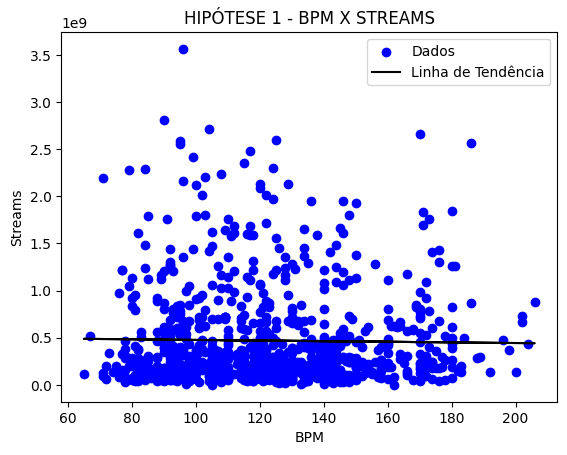

Resultado do coeficiente de correlação: -0.017651098391198144
Valor p: 0.5958975285867597


In [16]:
#Regressão Linear - Hipótese 1

X = gravadora['bpm'].values
Y = gravadora['streams_corrigido'].values

# Scatter plot
plt.scatter(X, Y, color='blue', label='Dados')

# Calcular a linha de tendência usando regressão linear
slope, intercept, _, _, _ = linregress(X, Y)
trendline = intercept + slope * X

# Plotar a linha de tendência
plt.plot(X, trendline, color='black', label='Linha de Tendência')

# Exibir o gráfico
plt.xlabel('BPM')
plt.ylabel('Streams')
plt.title('HIPÓTESE 1 - BPM X STREAMS')
plt.legend()
plt.show()

# Calcular e exibir o coeficiente de correlação e o valor p
r, p_value = pearsonr(X, Y)
print(f'Resultado do coeficiente de correlação: {r}')
print(f'Valor p: {p_value}')

**HIPÓTESE 2**
Os gráficos de Regressão Linear abaixo, mostram uma correlação entre as variaveis Apple Charts, Deezer Charts e Spotify Charts.

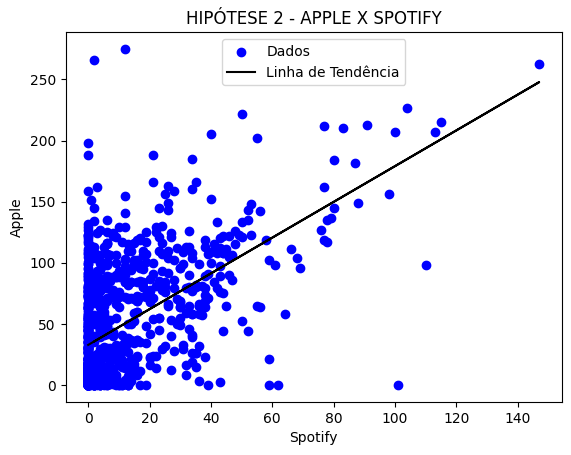

Resultado do coeficiente de correlação: 0.5629777491277478
Valor p: 8.501514320831147e-77


In [17]:
#Regressão Linear - Hipótese 2

X = gravadora['in_spotify_charts'].values
Y = gravadora['in_apple_charts'].values

# Scatter plot
plt.scatter(X, Y, color='blue', label='Dados')

# Calcular a linha de tendência usando regressão linear
slope, intercept, _, _, _ = linregress(X, Y)
trendline = intercept + slope * X

# Plotar a linha de tendência
plt.plot(X, trendline, color='black', label='Linha de Tendência')

# Exibir o gráfico
plt.xlabel('Spotify')
plt.ylabel('Apple')
plt.title('HIPÓTESE 2 - APPLE X SPOTIFY')
plt.legend()
plt.show()

# Calcular e exibir o coeficiente de correlação e o valor p
r, p_value = pearsonr(X, Y)
print(f'Resultado do coeficiente de correlação: {r}')
print(f'Valor p: {p_value}')

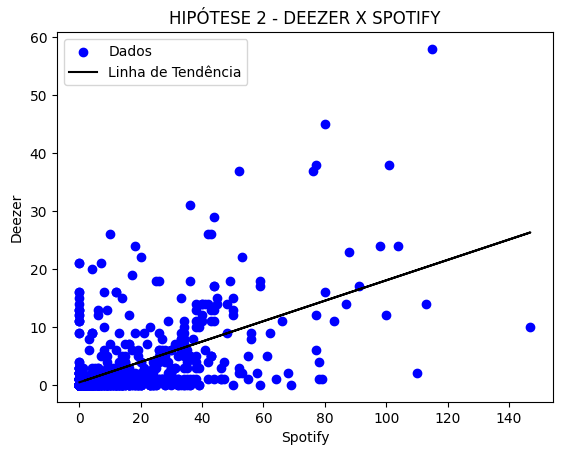

Resultado do coeficiente de correlação: 0.5829637882962725
Valor p: 1.686593380797076e-83


In [18]:
#Regressão Linear - Hipótese 2

X = gravadora['in_spotify_charts'].values
Y = gravadora['in_deezer_charts'].values

# Scatter plot
plt.scatter(X, Y, color='blue', label='Dados')

# Calcular a linha de tendência usando regressão linear
slope, intercept, _, _, _ = linregress(X, Y)
trendline = intercept + slope * X

# Plotar a linha de tendência
plt.plot(X, trendline, color='black', label='Linha de Tendência')

# Exibir o gráfico
plt.xlabel('Spotify')
plt.ylabel('Deezer')
plt.title('HIPÓTESE 2 - DEEZER X SPOTIFY')
plt.legend()
plt.show()

# Calcular e exibir o coeficiente de correlação e o valor p
r, p_value = pearsonr(X, Y)
print(f'Resultado do coeficiente de correlação: {r}')
print(f'Valor p: {p_value}')

**HIPÓTESE 3**
O gráfico de Regressão Linear abaixo, mostra uma correlação forte entre as variaveis Total playlists e Streams.

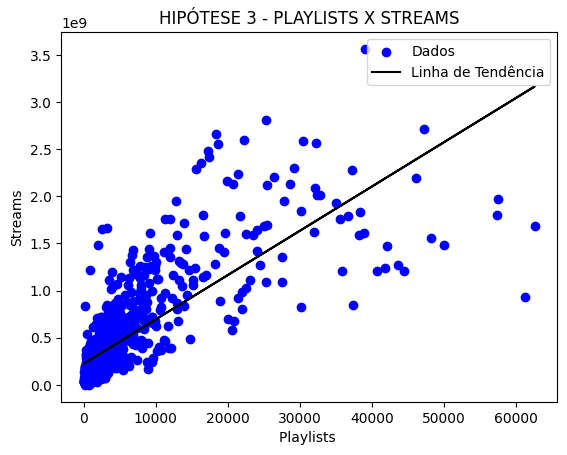

Resultado do coeficiente de correlação: 0.7781508738095403
Valor p: 1.3755869973100921e-184


In [19]:
#Regressão Linear - Hipótese 3

X = gravadora['total_playlists'].values
Y = gravadora['streams_corrigido'].values

# Scatter plot
plt.scatter(X, Y, color='blue', label='Dados')

# Calcular a linha de tendência usando regressão linear
slope, intercept, _, _, _ = linregress(X, Y)
trendline = intercept + slope * X

# Plotar a linha de tendência
plt.plot(X, trendline, color='black', label='Linha de Tendência')

# Exibir o gráfico
plt.xlabel('Playlists ')
plt.ylabel('Streams')
plt.title('HIPÓTESE 3 - PLAYLISTS X STREAMS')
plt.legend()
plt.show()

# Calcular e exibir o coeficiente de correlação e o valor p
r, p_value = pearsonr(X, Y)
print(f'Resultado do coeficiente de correlação: {r}')
print(f'Valor p: {p_value}')

**HIPÓTESE 4**
O gráfico de Regressão Linear abaixo, mostra uma correlação forte entre as variaveis Total de músicas e Streams.

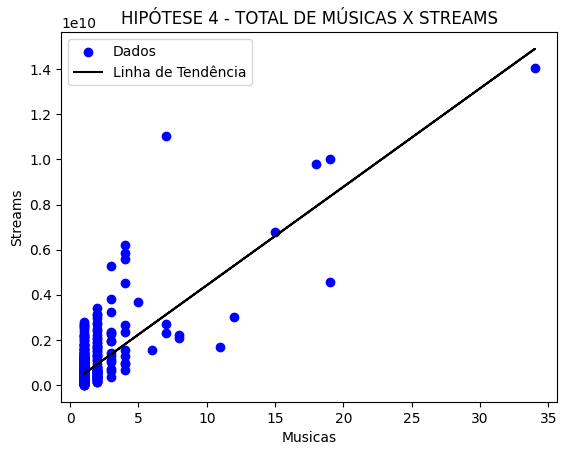

Resultado do coeficiente de correlação: 0.7657111547670649
Valor p: 2.1146266421201914e-119


In [20]:
#Regressão Linear - Hipótese 4

X = n_musicas['total_musicas'].values
Y = n_musicas['total_streams'].values

# Scatter plot
plt.scatter(X, Y, color='blue', label='Dados')

# Calcular a linha de tendência usando regressão linear
slope, intercept, _, _, _ = linregress(X, Y)
trendline = intercept + slope * X

# Plotar a linha de tendência
plt.plot(X, trendline, color='black', label='Linha de Tendência')

# Exibir o gráfico
plt.xlabel('Musicas')
plt.ylabel('Streams')
plt.title('HIPÓTESE 4 - TOTAL DE MÚSICAS X STREAMS')
plt.legend()
plt.show()

# Calcular e exibir o coeficiente de correlação e o valor p
r, p_value = pearsonr(X, Y)
print(f'Resultado do coeficiente de correlação: {r}')
print(f'Valor p: {p_value}')

**HIPÓTESE 5**
Os gráficos de Regressão Linear abaixo, mostram que as caracteristicas da música não possuem uma correlação com a variável Stream.

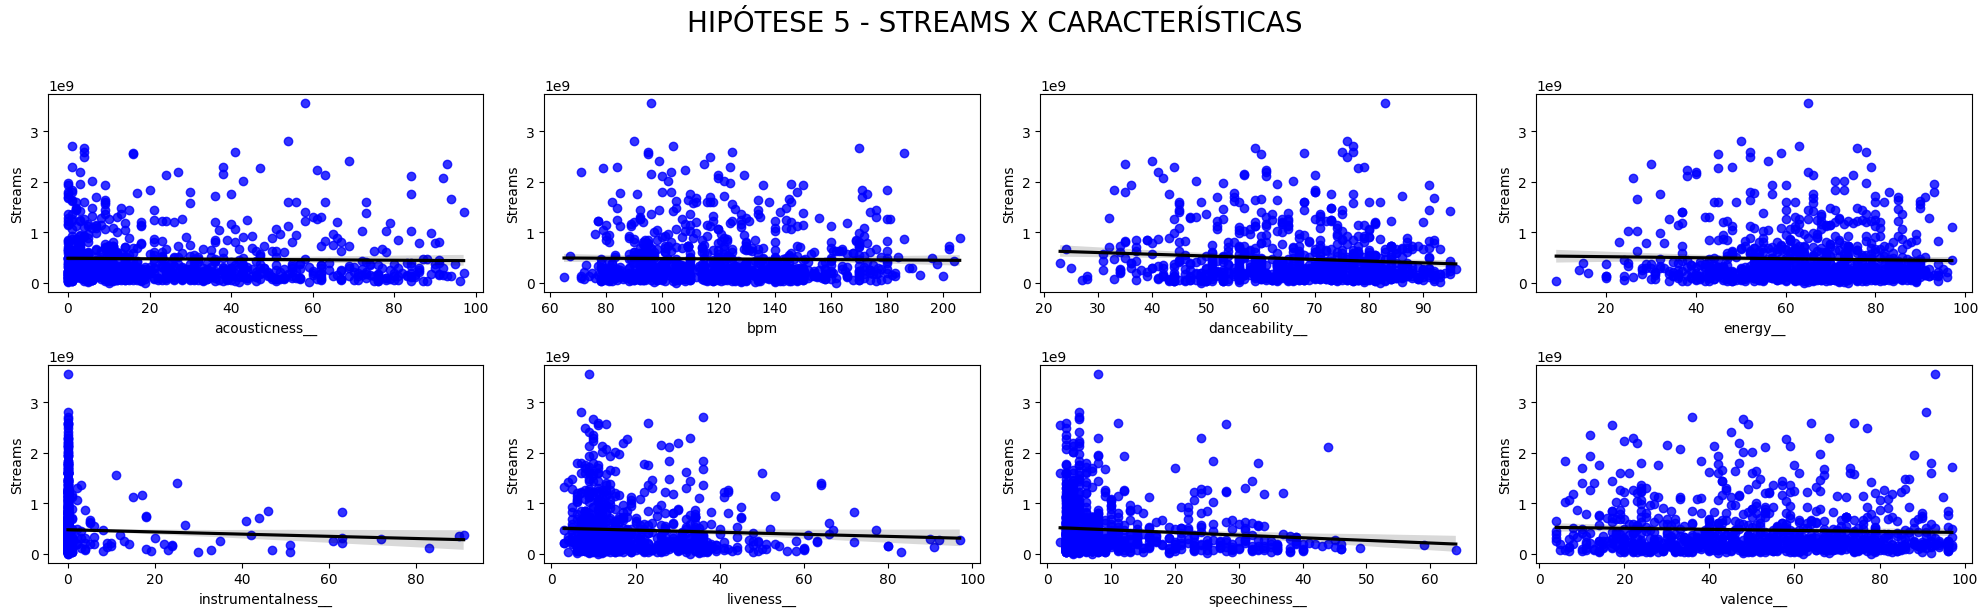

In [21]:
#Regressão Linear - Hipótese 5

# Lista de variáveis independentes = características da música
caracteristicas = ['acousticness__', 'bpm', 'danceability__', 'energy__', 'instrumentalness__', 'liveness__', 'speechiness__', 'valence__']

# Definir o número de colunas e calcular o número de linhas necessário
num_cols = 4
num_rows = math.ceil(len(caracteristicas) / num_cols)

# Criar subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 3))

# Ajustar o título principal da figura
fig.suptitle('HIPÓTESE 5 - STREAMS X CARACTERÍSTICAS', fontsize=20, y=1.02)

# A função flatten() transforma a matriz 2x2 (array) em uma lista unidimensional contendo todos os eixos, para facilitar a iteração
axes = axes.flatten()

# Plotar cada gráfico de dispersão com linha de regressão
for ax, car in zip(axes, caracteristicas):
    sns.regplot(x=car, y='streams_corrigido', data=gravadora, ax=ax,
                scatter_kws={'color': 'blue'}, line_kws={'color': 'black'})
    ax.set_xlabel(car)
    ax.set_ylabel('Streams')

# Remover eixos vazios
for i in range(len(caracteristicas), len(axes)):
    fig.delaxes(axes[i])

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

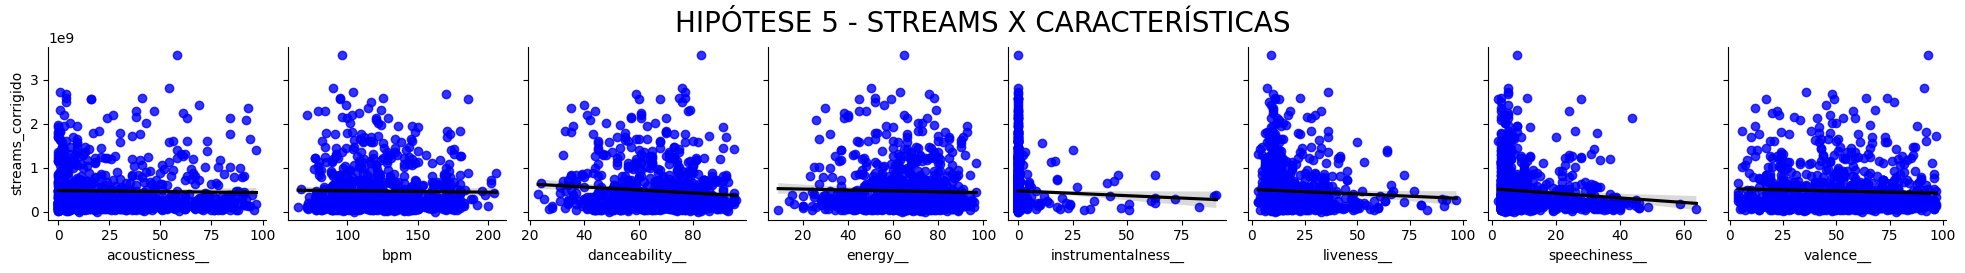

In [22]:
#Regressão Linear - Hipótese 5

# Gráficos de dispersão entre 'streams_corrigido' e características da música
ax = sns.pairplot(gravadora,
                  y_vars='streams_corrigido',
                  x_vars=['acousticness__', 'bpm', 'danceability__', 'energy__', 'instrumentalness__', 'liveness__', 'speechiness__', 'valence__'],
                  kind='reg',
                  plot_kws={'line_kws':{'color':'black'}, 'scatter_kws': {'color': 'blue'}})

# Ajustar o título da figura
ax.fig.suptitle('HIPÓTESE 5 - STREAMS X CARACTERÍSTICAS', fontsize=20, y=1.05)

# Exibir o gráfico
plt.show()

## 📊 GRÁFICOS PARA A VISUALIZAÇÃO DE DADOS :

Nas duas próximas visualizações gráficas, apresentamos os 10 artistas com a maior quantidade de músicas e os 10 artistas com a maior quantidade de streams. Ao comparar esses dois gráficos, podemos confirmar o que foi demonstrado pelo gráfico de regressão linear da hipótese 3: quanto maior o número de músicas de um artista, maior será a quantidade de streams que ele receberá.

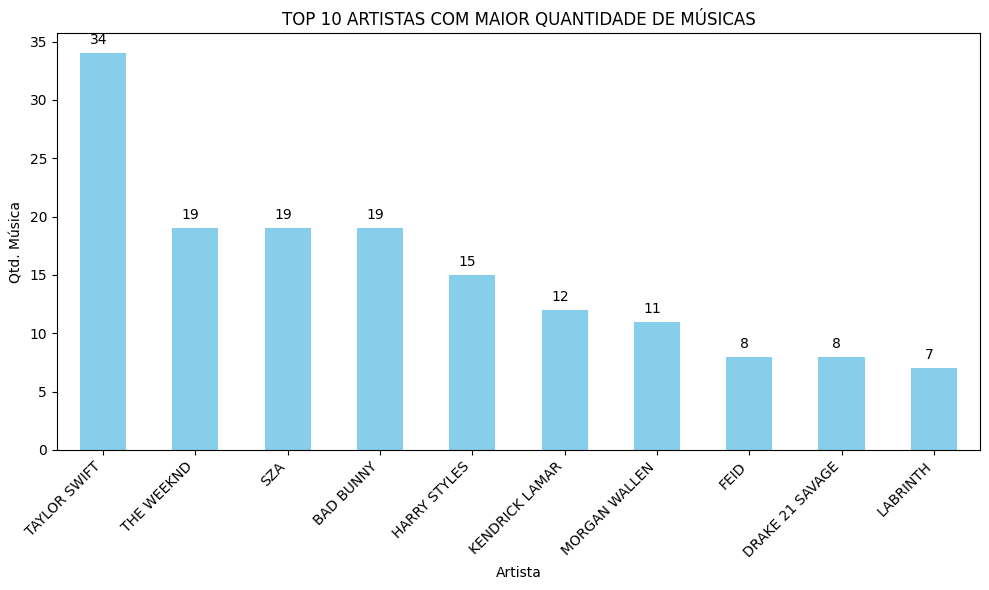

In [23]:
# Contar a frequência de cada cantor
top_cantores = gravadora['artist_name_limpo'].value_counts().head(10)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Plotar as barras e adicionar rótulos de dados
bars = top_cantores.plot(kind='bar', color='skyblue')
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.05, bar.get_height() + 0.5, round(bar.get_height(), 2), ha='center', va='bottom')

# Adicionar rótulos e título
plt.xlabel('Artista')
plt.ylabel('Qtd. Música')
plt.title('TOP 10 ARTISTAS COM MAIOR QUANTIDADE DE MÚSICAS')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.tight_layout()
plt.show()

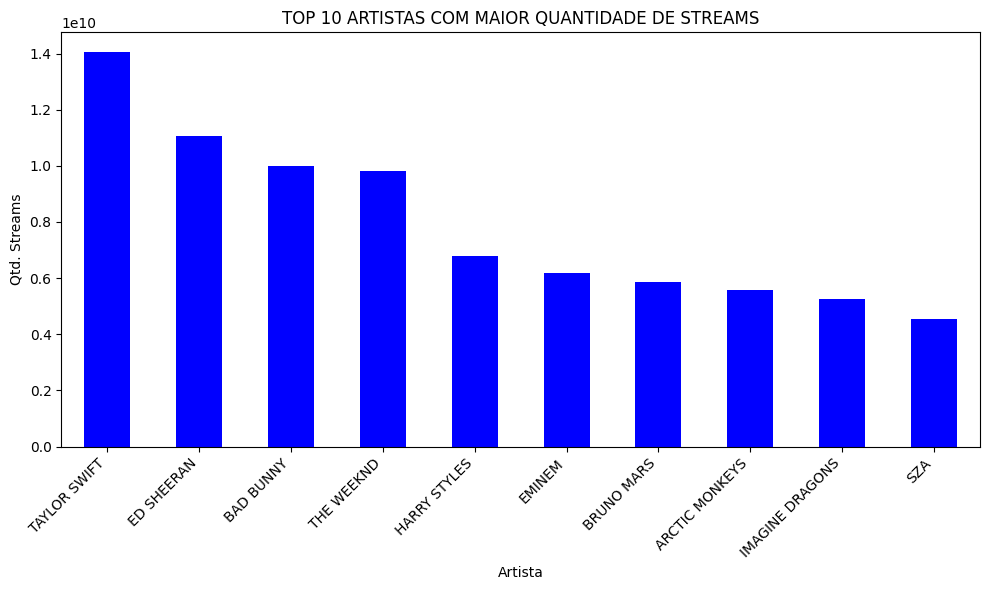

In [24]:
# Agrupar os dados pelo nome do artista e somar os streams para cada artista
top_artistas = gravadora.groupby('artist_name_limpo')['streams_corrigido'].sum()

# Selecionar os 10 artistas com o maior número total de streams
top_artistas = top_artistas.nlargest(10)

# Plotar o gráfico de barras empilhadas
top_artistas.plot(kind='bar', stacked=True, figsize=(10, 6), color='blue')

# Adicionar rótulos e título
plt.xlabel('Artista')
plt.ylabel('Qtd. Streams')
plt.title('TOP 10 ARTISTAS COM MAIOR QUANTIDADE DE STREAMS')

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Exibir o gráfico
plt.tight_layout()
plt.show()

No gráfico abaixo, fica evidenciado que uma música com um ritmo mais acelerado, medido em beats por minuto (bpm), apresenta um valor médio de 122,18 streams. Por outro lado, uma música com um ritmo mais lento tem uma média de aproximadamente 122,52 streams, uma diferença de apenas 0,34. Isso representa uma variação de aproximadamente 0,28%, indicando que a influência do ritmo na quantidade de streams é mínima. Assim, podemos concluir que a característica do ritmo da música não parece ter um impacto significativo na quantidade de streams que ela recebe. O mesmo ocorre com outras características analisadas no gráfico abaixo. Essa conclusão é consistente com o padrão observado em nosso gráfico de regressão linear das hipóteses 1 e 5.

<Figure size 1200x400 with 0 Axes>

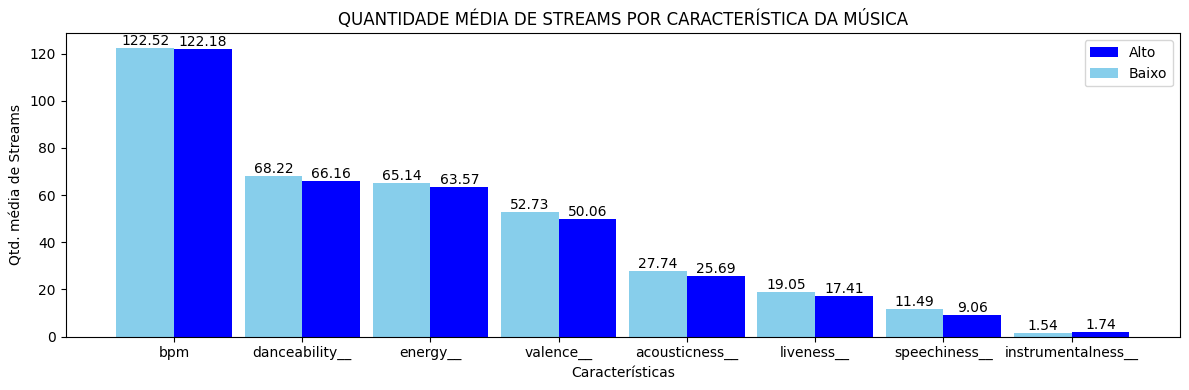

In [25]:
# Selecionar as variáveis
variaveis = ['bpm', 'danceability__', 'energy__', 'valence__', 'acousticness__', 'liveness__', 'speechiness__', 'instrumentalness__']

# Largura das barras
largura_barra = 0.45

# Definir o tamanho da figura
plt.figure(figsize=(12, 4))  # Define o tamanho da figura

# Criar um gráfico de barras para cada variável
indice = np.arange(len(variaveis))

# Armazenar as médias de streams
streamsAlto = []
streamsBaixo = []

# Calcular as médias de streams para "Alto" e "Baixo" para cada variável
for variavel in variaveis:
    streamsAlto.append(estatisticas[variavel].loc['Alto', 'mean'])
    streamsBaixo.append(estatisticas[variavel].loc['Baixo', 'mean'])

# Criar o gráfico de barras
plt.figure(figsize=(12, 4))  # Define o tamanho da figura
barra_alto = plt.bar(indice + largura_barra/2, streamsAlto, width=largura_barra, label='Alto', color='blue')
barra_baixo = plt.bar(indice - largura_barra/2, streamsBaixo, width=largura_barra, label='Baixo', color='skyblue')

# Adicionar rótulos com porcentagem nas barras
for barra in barra_alto + barra_baixo:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2., altura, '%.2f' % (altura), ha='center', va='bottom')

plt.xlabel('Características')
plt.ylabel('Qtd. média de Streams')
plt.title('QUANTIDADE MÉDIA DE STREAMS POR CARACTERÍSTICA DA MÚSICA')
plt.xticks(indice, variaveis)
plt.legend()
plt.tight_layout()
plt.show()

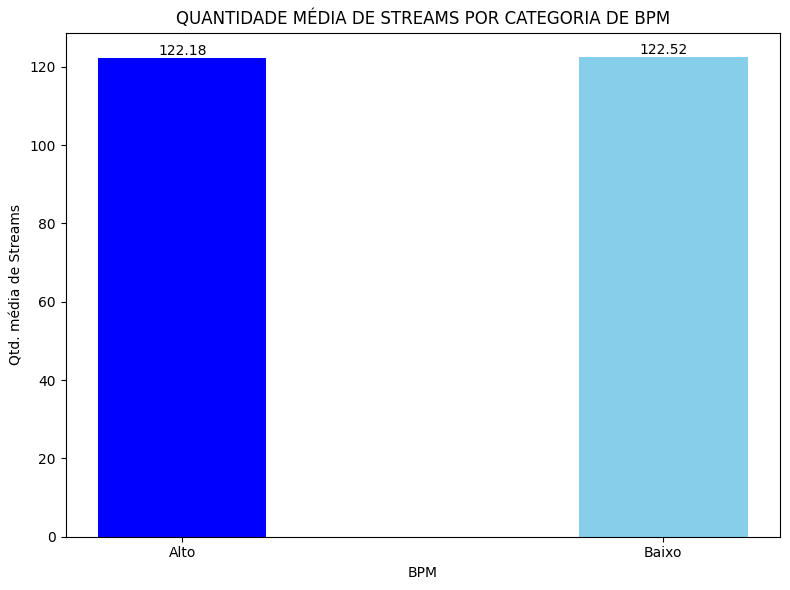

In [26]:
# Definindo os dados de exemplo com base no grafico acima
estatisticas = {
    'bpm': {
        'Alto': {'mean': 122.18},
        'Baixo': {'mean': 122.52}
    }
}

# Largura das barras
largura_barra = 0.35

# Criar um gráfico de barras para cada variável
indice = np.arange(2)  # Dois grupos: 'Alto' e 'Baixo'

# Armazenar as médias de streams
streams = [estatisticas['bpm']['Alto']['mean'], estatisticas['bpm']['Baixo']['mean']]

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))  # Define o tamanho da figura
plt.bar(indice, streams, width=largura_barra, color=['blue', 'skyblue'])

# Adicionar rótulos com porcentagem nas barras
for i, valor in enumerate(streams):
    plt.text(i, valor, '%.2f' % valor, ha='center', va='bottom')

plt.xlabel('BPM')
plt.ylabel('Qtd. média de Streams')
plt.title('QUANTIDADE MÉDIA DE STREAMS POR CATEGORIA DE BPM')
plt.xticks(indice, ['Alto', 'Baixo'])
plt.tight_layout()
plt.show()



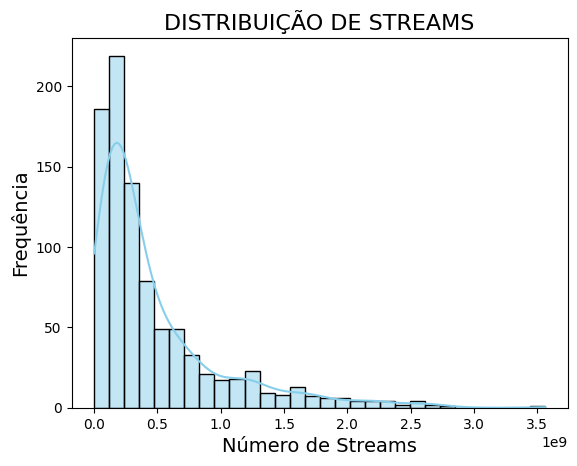

<Figure size 1200x600 with 0 Axes>

In [34]:
# Histograma Streams
sns.histplot(gravadora, x='streams_corrigido', bins=30, kde=True, color='skyblue')

# Títulos e labels mais descritivos
plt.title("DISTRIBUIÇÃO DE STREAMS", fontsize=16)
plt.xlabel("Número de Streams", fontsize=14)
plt.ylabel("Frequência", fontsize=14)

# Tamanho do grafico
plt.figure(figsize=(12, 6))

# Melhorar a estética geral
sns.despine()

# Exibir o histograma
plt.show()